# Coursera - The Pseudo-Spectral Method - Acoustic Waves in 1D

## Import libraries

In [23]:
import sys
!{sys.executable} -m pip install ricker
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ricker import ricker

## Define parameters

In [24]:
x_n_points = 2024               # Number of grid points in X
t_n_points = 3500               # Number of time steps
c = 343                         # Wave velocity in medium, m/s
dx = 1250/float(x_n_points - 1)
eps = 0.2                       # CFL stability criteria
dt = eps*dx/float(c)
source_x = 1250                 # Source location in X, m
f_0 = 60                        # Dominant frequency, Hz
x = np.zeros(x_n_points)        # Define co-ordinate in X
for i in range(0, x_n_points - 1):
    x[i] = i * dx
f_snap = 50                     # Snapshot frequency

p = np.zeros(x_n_points)        # Pressure at time n
p_next = np.zeros(x_n_points)   # Pressure at time n+1
p_prev = np.zeros(x_n_points)   # Pressure at time n-1
d2p_x = np.zeros(x_n_points)    # 2nd derivative of pressure in X

sigma = 2*dx                    # Spatial source function
x_0 = x[source_x - 1]
sg = np.exp(-1/float(sigma)**2 *(x - x_0)**2)
sg = sg/float(np.amax(sg))

t = np.arange(1, t_n_points + 1)*dt  # initialize time axis
T_0 = 1/(f_0)              # Time period
temp = ricker(dt, T_0)
temp = np.diff(temp)
source_f = np.zeros(t_n_points)
source_f[0:np.size(temp)] = temp
lam = c*T_0

## Plot the fourier wave

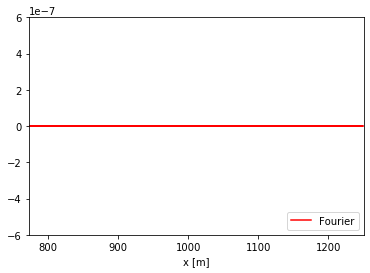

In [25]:
plt.ion()

fig, (ax1) = plt.subplots(1)
line1 = ax1.plot(x[source_x:], p[source_x:], 'r', lw=1.5, label='Fourier')
ax1.axis([source_x*dx, x_n_points*dx, -6E-7, 6E-7])
ax1.set_xlabel('x [m]')
ax1.legend(loc=4)

plt.show()

## Fourier transform method

In [26]:
for it in range(t_n_points):

    nx = np.size(p)
    kmax = np.pi / float(dx)                                # K defined by Nyquist wave number
    dk = kmax /(nx / float(2))
    k = np.arange(float(nx))
    k[: int(nx/2)] = k[: int(nx/2)] * dk
    k[int(nx/2):] = k[: int(nx/2)] - kmax

    # Fourier derivative
    ff = np.fft.fft(p)
    ff = (1j * k) ** 2 * ff
    d2p_x = np.real(np.fft.ifft(ff))                        # 2nd space derivative

    p_next = 2 * p - p_prev + c ** 2 * dt ** 2 * d2p_x      # pressure at time n+1
    p_next = p_next + sg * source_f[it] * dt ** 2           # Add source
    p_prev, p = p, p_next                                   # Assigning the pressure to the next value
    p[1] = 0                                                # Set boundary conditions
    p[x_n_points - 1] = 0


    if not it % f_snap:
        for l in line1:
            l.remove()
            del l

        line1 = ax1.plot(x[source_x:], p[source_x:], 'r', lw=1.5)
        plt.gcf().canvas.draw()
plt.show()

<Figure size 432x288 with 0 Axes>